#                                Browser fingerprint analysis 

## Importing of necessary librairies

In [182]:
%matplotlib notebook
import MySQLdb as mdb
import numpy as np
import csv
import sys
import re
sys.path.append("../src/")
from src.fingerprint import Fingerprint
from src import CSV_DELIMITER

import pandas as pd
import matplotlib.pyplot as plt
from src.analyse import compute_normalized_entropy

DATA_PATH_REL = "../../data/"

#Matplotlib figures inserted into the notebook
%pylab inline

import datetime
import seaborn

Populating the interactive namespace from numpy and matplotlib


/home/spirals/PycharmProjects/stage/myvenv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'diff', 'e', 'number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ModuleNotFoundError: No module named 'seaborn'

## Read the file

In [2]:
# Exclusion of some attributes
ATTRIBUTES_TO_EXCLUDE = [Fingerprint.COUNTER, Fingerprint.CREATION_TIME, Fingerprint.END_TIME, Fingerprint.CONSISTENT]

In [3]:
# read the file
df = pd.read_csv(DATA_PATH_REL + "processed/fingerprint_dataset.csv", delimiter=CSV_DELIMITER, engine="python")

## Visualization of consistent fingerprints

In [4]:
# Analysis of consistent fingerprints
attributes_to_analyze = [attribute for attribute in df.columns.tolist() if attribute not in ATTRIBUTES_TO_EXCLUDE]
df_consistent = df[df[Fingerprint.CONSISTENT] == True ]
print("There are {:d} elements in df_consistent".format(len(df_consistent)))

There are 49271 elements in df_consistent


In [5]:
# Name of attributes
print(df_consistent.columns, "There are {:d} columns in df_consistent".format(len(df_consistent.columns)))

Index(['counter', 'id', 'creationDate', 'endDate', 'addressHttp',
       'userAgentHttp', 'acceptHttp', 'connectionHttp', 'encodingHttp',
       'languageHttp', 'orderHttp', 'pluginsJSHashed', 'platformJS',
       'cookiesJS', 'dntJS', 'timezoneJS', 'resolutionJS', 'localJS',
       'sessionJS', 'canvasJSHashed', 'fontsFlashHashed', 'resolutionFlash',
       'languageFlash', 'platformFlash', 'browserFamily',
       'globalBrowserVersion', 'minorBrowserVersion', 'majorBrowserVersion',
       'os', 'rendererWebGLJS', 'vendorWebGLJS', 'pluginsJS', 'consistent'],
      dtype='object') There are 33 columns in df_consistent


In [6]:
# Visualization of the first 5 lines
df_consistent.head(5)

counter                                    id         creationDate  \
15       17  0f4f77e3-80da-4b4a-b9c0-f5e8c4239380  2015-07-27 11:00:00   
17       19  74bf8f6f-0114-44b4-9bca-1cfc52ffc2d3  2015-07-27 12:00:00   
18       20  df46c5fb-9889-4ff4-9f51-e5af591f3460  2015-07-27 12:00:00   
19       21  dc031028-a4ea-4ce8-a362-17b07a4f4d65  2015-07-27 12:00:00   
20       22  d51d09c6-2596-4958-bfe7-0352af2aaccf  2015-07-27 12:00:00   

                endDate                               addressHttp  \
15                 None  24f5398bba446ce8dadfd3d23ca2f4e58895e76e   
17                 None  24f5398bba446ce8dadfd3d23ca2f4e58895e76e   
18                 None  24f5398bba446ce8dadfd3d23ca2f4e58895e76e   
19  2015-07-28 11:00:00  90f2974eff1d1b3f05d01f413cf0241fae23352e   
20  2015-07-29 06:00:00  2515ee56512877237d467911f5c55be53eea3550   

                                        userAgentHttp  \
15  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...   
17  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...   
18  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...   
19  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...   
20  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...   

                                           acceptHttp connectionHttp  \
15  text/html,application/xhtml+xml,application/xm...          close   
17  text/html,application/xhtml+xml,application/xm...          close   
18  text/html,application/xhtml+xml,application/xm...          close   
19  text/html,application/xhtml+xml,application/xm...          close   
20  text/html,application/xhtml+xml,application/xm...          close   

           encodingHttp                         languageHttp    ...      \
15  gzip, deflate, sdch              en-US,en;q=0.8,fr;q=0.6    ...       
17  gzip, deflate, sdch              en-US,en;q=0.8,fr;q=0.6    ...       
18  gzip, deflate, sdch              en-US,en;q=0.8,fr;q=0.6    ...       
19  gzip, deflate, sdch  fr-FR,fr;q=0.8,en-US;q=0.6,en;q=0.4    ...       
20  gzip, deflate, sdch  fr-FR,fr;q=0.8,en-US;q=0.6,en;q=0.4    ...       

     platformFlash browserFamily globalBrowserVersion minorBrowserVersion  \
15           Linux        Chrome                  440                   0   
17           Linux        Chrome                  440                   0   
18           Linux        Chrome                  440                   0   
19  Mac OS 10.10.4        Chrome                  440                   0   
20           Linux        Chrome                  430                   0   

   majorBrowserVersion        os                       rendererWebGLJS  \
15                  44     Linux     Mesa DRI Intel(R) Haswell Mobile    
17                  44     Linux     Mesa DRI Intel(R) Haswell Mobile    
18                  44     Linux     Mesa DRI Intel(R) Haswell Mobile    
19                  44  Mac OS X  Intel HD Graphics 5000 OpenGL Engine   
20                  43     Linux                         Not supported   

                          vendorWebGLJS  \
15  Intel Open Source Technology Center   
17  Intel Open Source Technology Center   
18  Intel Open Source Technology Center   
19                           Intel Inc.   
20                        Not supported   

                                            pluginsJS consistent  
15  Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...       True  
17  Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...       True  
18  Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...       True  
19  Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...       True  
20  Plugin 0: Chrome PDF Viewer; ; mhjfbmdgcfjbbpa...       True  

[5 rows x 33 columns]

In [7]:
print("Statistics on dataset filtered: only consistent browsers") 
number_distinct_list=[]
for attribute in attributes_to_analyze:
    nb_distinct_values_by_attribute = df_consistent[attribute].value_counts()
    nb_distinct_values_global = nb_distinct_values_by_attribute.count()
    nb_unique_values = len(nb_distinct_values_by_attribute[nb_distinct_values_by_attribute.values == 1])


    number_distinct_list.append({
           "Attribute": attribute,
           "Distinct values": nb_distinct_values_global,
           "Unique values": nb_unique_values
      })   
number_distinct_df=pd.DataFrame(number_distinct_list).sort_values(by="Distinct values", ascending=False).reset_index(drop=True)
number_distinct_df

Statistics on dataset filtered: only consistent browsers


Attribute  Distinct values  Unique values
0            addressHttp            15781          10862
1       fontsFlashHashed             4684           2152
2                     id             4651           2125
3        pluginsJSHashed             4247           1961
4              pluginsJS             4246           1961
5          userAgentHttp             2289            980
6         canvasJSHashed              938            292
7        rendererWebGLJS              489            108
8           resolutionJS              446            218
9           languageHttp              424             89
10       resolutionFlash              257            109
11         platformFlash              222             69
12             orderHttp              114             40
13  globalBrowserVersion               78             21
14   majorBrowserVersion               43              5
15            timezoneJS               33              3
16         languageFlash               27              2
17   minorBrowserVersion               21              3
18         browserFamily               18              5
19            platformJS               17              6
20                    os               14              1
21         vendorWebGLJS               13              0
22          encodingHttp               12              1
23            acceptHttp                7              4
24             sessionJS                2              0
25                 dntJS                2              0
26             cookiesJS                2              0
27               localJS                2              0
28        connectionHttp                1              0

## Descriptive analysis of consistent fingerprints

In [10]:
def display_entropy(df, attributes):
    data_df = []
    for attribute in attributes:
        data_df.append({
           "Attribute": attribute,
           "Relative entropy": compute_normalized_entropy(df, attribute)
       })    
    entropy_df = pd.DataFrame(data_df).sort_values(by="Relative entropy", ascending=False).reset_index(drop=True)
    print(entropy_df)

attributes = [attribute for attribute in attributes_to_analyze if attribute != "id"]
display_entropy(df_consistent, attributes_to_analyze)

               Attribute  Relative entropy
0            addressHttp          0.888301
1                     id          0.781561
2              pluginsJS          0.630395
3          userAgentHttp          0.613847
4        pluginsJSHashed          0.610079
5       fontsFlashHashed          0.542996
6         canvasJSHashed          0.487428
7           languageHttp          0.320505
8           resolutionJS          0.289189
9   globalBrowserVersion          0.269478
10       rendererWebGLJS          0.266548
11   majorBrowserVersion          0.264609
12       resolutionFlash          0.232677
13            timezoneJS          0.227500
14         platformFlash          0.222875
15             orderHttp          0.193803
16                    os          0.171668
17         languageFlash          0.164726
18          encodingHttp          0.122460
19         vendorWebGLJS          0.116709
20            platformJS          0.108445
21         browserFamily          0.087173
22         

In [6]:
# terms : effective, %
# number of unique terms
# most common terms
def terms_analysis(df, attribute):
    tmp_stats = []
    ids = set(df['id'].unique())
    for user_id in ids:
        df_user_id = df[df_consistent['id'] == user_id]
        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id,
                attribute : value
            })
    df_stats = pd.DataFrame(tmp_stats)
    
    nb = df_stats[attribute].value_counts()
    df_nb = pd.DataFrame(nb)
    
    nb_percent = nb/nb.sum()*100
    df_nb_percent = pd.DataFrame(nb_percent)
    
    tab = df_nb.join(df_nb_percent, lsuffix='_left', rsuffix='_right')
    tab.columns = ['effective', '%']
    
    
    print(tab)
    print()
    
    df_nb[:20].plot(kind='barh', stacked=False, width=0.9)
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', linestyle = 'dashed')
    plt.title('The 20 first {}'.format(attribute))
    plt.xlabel('effective')
    plt.ylabel(attribute)
    plt.show()
    
    print("There are {:d} unique terms for the attribute '{}'".format(len(nb[nb.values == 1]), attribute))
    print()
    print("The most used terms are: \n{}".format(nb[:5]))

     effective          %
yes       4268  89.494653
no         501  10.505347



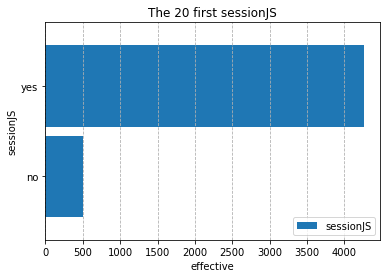

There are 0 unique terms for the attribute 'sessionJS'

The most used terms are: 
yes    4268
no      501
Name: sessionJS, dtype: int64


In [7]:
terms_analysis(df_consistent, 'sessionJS')

The distinct values for the attribute 'languageHttp' are : 
 ['de' 'pt' 'ru' 'en' 'fr' 'cs' 'da' 'it' 'nl' 'sv' 'sl' 'es' 'nb' 'hu'
 'pl' 'sh' 'ja' 'ac' 'uk' 'zh' 'tr' 'az' 'sk' 'fi' 'ko' 'th' 'vi' 'hr'
 'ro' 'an' 'ch' 'ca' 'ar' 'lt' 'el' 'af' 'bg' 'et']

    effective          %
en       2672  53.968895
ru        850  17.168249
fr        583  11.775399
de        320   6.463341
es         79   1.595637
it         61   1.232074
pl         59   1.191678
zh         57   1.151283
nl         52   1.050293
pt         42   0.848313
hu         35   0.706928
cs         21   0.424157
ja         18   0.363563
uk         13   0.262573
da         12   0.242375
tr          8   0.161584
ac          8   0.161584
sv          8   0.161584
fi          6   0.121188
vi          6   0.121188
ko          5   0.100990
sk          5   0.100990
af          4   0.080792
hr          4   0.080792
lt          3   0.060594
sl          3   0.060594
el          2   0.040396
nb          2   0.040396
sh          2   0.0

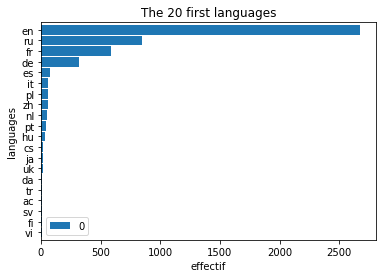

There are 7 unique terms for the attribute 'languageHttp'

The most used terms are: 
en    2672
ru     850
fr     583
de     320
es      79
Name: 0, dtype: int64


In [10]:
# terms analysis for the attribute 'languageHttp'
tmp_stats = []
ids = set(df_consistent['id'].unique())
for user_id in ids:
    df_user_id = df_consistent[df_consistent['id'] == user_id]
    different_values = df_user_id['languageHttp'].unique()
    for value in different_values:
        tmp_stats.append({
            "id": user_id,
            'languageHttp' : value
        })
df_stats = pd.DataFrame(tmp_stats)

language_http=df_stats['languageHttp']
language_http_less_nan=language_http.dropna()
language_http_less_nan_list= language_http_less_nan.values.tolist()

languages = []
for i in range(0,len(language_http_less_nan_list)):    
    languages.append(language_http_less_nan_list[i][:2])

langues_df = pd.DataFrame(languages)

print("The distinct values for the attribute 'languageHttp' are : \n {}".format(langues_df[0].unique()))

    
nb = langues_df[0].value_counts()
df_nb = pd.DataFrame(nb)
    
nb_percent = nb/nb.sum()*100
df_nb_percent = pd.DataFrame(nb_percent)
    
tab = df_nb.join(df_nb_percent, lsuffix='_left', rsuffix='_right')
tab.columns = ['effective', '%']

print()
print(tab)
print()

df_nb[:20].plot(kind='barh', stacked=False, width=0.9)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle = 'dashed')
plt.title('The 20 first languages')
plt.xlabel('effective')
plt.ylabel('languages')
plt.show()

print("There are {:d} unique terms for the attribute 'languageHttp'".format(len(nb[nb.values == 1])))
print()
print("The most used terms are: \n{}".format(nb[:5]))


In [102]:
#modality of plugins
tmp_stats = []
plugins=re.findall("Plugin [0-9]+: ([a-zA-Z -.]+)", str(df_consistent['pluginsJS']))
plugins_df=pd.DataFrame(plugins)
plugins_df[0].unique()

array(['Chrome PDF Viewer', 'Chromium PDF Viewer',
       'Default Browser Helper', 'Shockwave Flash', 'DivX',
       'Gnome Shell Integration', 'Google Update', 'Native Client',
       'Adobe Acrobat'], dtype=object)

In [8]:
def analysis_terms_splited(df, attribute, split_function):
    tmp_dataset = []
    tmp_stats = []
    ids = set(df_consistent['id'].unique())
    for user_id in ids:
        df_user_id = df_consistent[df_consistent['id'] == user_id]
        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id
            })
            values_split = split_function(value)

            for value_tmp in values_split:
                tmp_dataset.append({
                    "id": user_id,
                    attribute: value_tmp
                })

    df_tmp = pd.DataFrame(tmp_dataset)
    df_stats = pd.DataFrame(tmp_stats)
    
    nb = df_tmp[attribute].value_counts()
    df_nb = pd.DataFrame(nb)
    
    nb_percent = nb/nb.sum()*100
    df_nb_percent = pd.DataFrame(nb_percent)
    
    tab = df_nb.join(df_nb_percent, lsuffix='_left', rsuffix='_right')
    tab.columns = ['effective', '%']
    
    
    print(tab)
    print()
    
    df_nb[:20].plot(kind='barh', stacked=False, width=0.9)
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', linestyle = 'dashed')
    plt.title('The 20 first {}'.format(attribute))
    plt.xlabel('effective')
    plt.ylabel(attribute)
    plt.show()
    
    print("There are {:d} unique terms for the attribute '{}'".format(len(nb[nb.values == 1]), attribute))
    print()
    print("The most used terms are: \n{}".format(nb[:5]))
    print()
    print("There are {:d} {}".format(len(nb), attribute))
    
def split_plugins(attribute):
    return re.findall("Plugin [0-9]+: ([a-zA-Z -.]+)", str(attribute))

def split_accept_http(accept):
    return accept.split(",")

def split_encoding_http(encoding):
    return encoding.split(", ")

def split_order_http(order):
    return order.split(" ")

def split_encoding_http(encoding):
    try:
        replacement=encoding.replace(","," ")
        junction=''.join(replacement)
        disjunction=junction.split()
        return disjunction 
    except:
        return [""]
 

                                                    effective          %
Chrome PDF Viewer                                        8912  14.564947
Shockwave Flash                                          8474  13.849121
Widevine Content Decryption Module                       4792   7.831601
Native Client                                            4679   7.646924
Microsoft Office                                         3228   5.275544
Adobe Acrobat                                            2889   4.721514
Google Update                                            2278   3.722952
Silverlight Plug-In                                      1862   3.043080
QuickTime Plug-in                                        1695   2.770151
JavaTM Platform SE                                       1657   2.708047
Java Deployment Toolkit                                  1591   2.600183
Intel                                                    1398   2.284762
VLC Web Plugin                                     

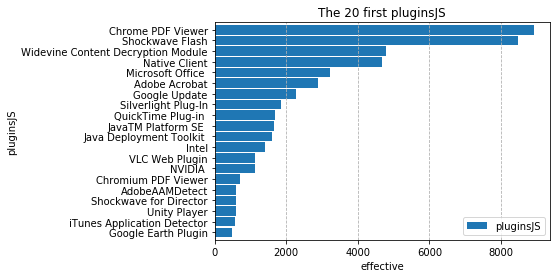

There are 106 unique terms for the attribute 'pluginsJS'

The most used terms are: 
Chrome PDF Viewer                     8912
Shockwave Flash                       8474
Widevine Content Decryption Module    4792
Native Client                         4679
Microsoft Office                      3228
Name: pluginsJS, dtype: int64

There are 460 pluginsJS


In [255]:
analysis_terms_splited(df_consistent, 'pluginsJS', split_plugins)

In [10]:
def analyze_grouped(df, attribute, group_by_attribute):
    tmp_stats = []
    ids = set(df['id'].unique())
    for user_id in ids:
        df_user_id = df[df_consistent['id'] == user_id]
        os_user = df_user_id["os"].values[0]
        browser_user = df_user_id["browserFamily"].values[0]

        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id,
                "os": os_user,
                "browserFamily": browser_user,
                attribute: value
            })
  
    df_stats = pd.DataFrame(tmp_stats)
    stats_grouped = df_stats[group_by_attribute].value_counts()
    grouped = df_stats.groupby([attribute])
    for name, group in grouped:
        norm = 0 
        count_per_group = group[group_by_attribute].value_counts()
        for key, number in stats_grouped.iteritems():
            try:
                norm += abs(number - count_per_group[key])
            except KeyError:
                norm += abs(number)

        if norm >= 0:
            print(name)
            print(count_per_group)

        print(norm)

In [38]:
analyze_grouped(df_consistent,'localJS', 'sessionJS')

KeyError: 'sessionJS'

In [11]:
def analyze_grouped_splited(df, attribute, group_by_attribute, split_function):
    tmp_dataset = []
    tmp_stats = []
    ids = set(df['id'].unique())
    for user_id in ids:
        df_user_id = df[df['id'] == user_id]
        os_user = df_user_id["os"].values[0]
        browser_user = df_user_id["browserFamily"].values[0]

        different_values = df_user_id[attribute].unique()
        for value in different_values:
            tmp_stats.append({
                "id": user_id,
                "os": os_user,
                "browserFamily": browser_user
            })
            values_split = split_function(value)

            for value_tmp in values_split:
                tmp_dataset.append({
                    "id": user_id,
                    "os": os_user,
                    "browserFamily": browser_user,
                    attribute: value_tmp

                })

    df_tmp = pd.DataFrame(tmp_dataset)
    df_stats = pd.DataFrame(tmp_stats)
    
    
    stats_grouped = df_stats.groupby(group_by_attribute).size()
    #print(stats_grouped)
    #stats_grouped = df_stats[group_by_attribute].value_counts()
    grouped = df_tmp.groupby([attribute])
    for name, group in grouped:
        norm = 0 
        count_per_group = group.groupby(group_by_attribute).size()
        #count_per_group = group[group_by_attribute].value_counts()
        for key, number in stats_grouped.iteritems():
            try:
                norm += (number - count_per_group[key])**2
            except KeyError:
                norm += number**2

        if norm >= 0:
            print(name)
            print(count_per_group)

        print(norm)

def split_headers(headers):
    return headers.split(" ")

def split_languages_http(languages):
    try:
        return languages.split(";")
    except AttributeError:
        return str(languages)
    
def split_accept_http(accept):
    return accept.split(",")

def split_plugins(attribute):
    return re.findall("Plugin [0-9]+: ([a-zA-Z -.]+)", str(attribute))

def split_order_http(order):
    return order.split(" ")

def split_encoding_http(encoding):
    try:
        replacement=encoding.replace(","," ")
        junction=''.join(replacement)
        disjunction=junction.split()
        return disjunction 
    except:
        return [""]

In [23]:
analyze_grouped_splited(df_consistent, 'encodingHttp', 'browserFamily', split_encoding_http)


browserFamily
Firefox    3
dtype: int64
11703118
br
browserFamily
Chrome            1597
Chromium            43
Dragon               3
Epiphany             1
Firefox           1912
IE Mobile            1
Iceweasel            3
Iron                28
Konqueror            1
Opera                8
Other                5
QupZilla             1
Rekonq               1
SeaMonkey            1
Vivaldi             38
Yandex Browser       4
dtype: int64
876300
bzip2
browserFamily
Chrome    1
dtype: int64
11713896
compress
browserFamily
Chrome    1
dtype: int64
11713896
deflate
browserFamily
Chrome                         2274
Chromium                         72
Dragon                            9
Epiphany                          2
Firefox                        2553
IE Mobile                         1
Iceweasel                        32
Iron                             37
Konqueror                         1
Maxthon                           1
Opera                            15
Other           

In [165]:
analyze_grouped_splited(df_consistent, 'vendorWebGLJS', ['os', 'browserFamily'], split_plugins)

os             browserFamily              
Chrome OS      Chrome                          72
FreeBSD        Chrome                           1
               Firefox                          3
Linux          Chrome                         304
               Firefox                        177
               Iceweasel                       32
               Iron                             6
               Konqueror                        1
               Opera                            1
               QupZilla                         1
               Rekonq                           1
               Vivaldi                         14
Mac OS X       Chrome                         390
               Firefox                        191
               Iron                             1
               Opera                            2
               SeaMonkey                        1
               Vivaldi                          6
NetBSD         Firefox                          1
OpenBSD

KeyError: 'vendorWebGLJS'

In [143]:
analyse_terms_splited(df_consistent,'encodingHttp',split_function=lambda encoding: encoding.split(","))

AttributeError: 'float' object has no attribute 'split'

## Inconsistent fingerprint detection

In [48]:
# Détection of inconsistent values
df_consistent[df_consistent['browserFamily']== "IE Mobile"]["os"]

87094    Other
87096    Other
87097    Other
Name: os, dtype: object

In [49]:
# N° of the fingerprint to take off it from consistent fingerprints
df_consistent[df_consistent['browserFamily'] == "IE Mobile"]["id"]

87094    d2869d31-770a-4e4a-b91a-331c47e1e144
87096    d2869d31-770a-4e4a-b91a-331c47e1e144
87097    d2869d31-770a-4e4a-b91a-331c47e1e144
Name: id, dtype: object

In [52]:
df_consistent[df_consistent['id']== "d2869d31-770a-4e4a-b91a-331c47e1e144"]

counter                                    id         creationDate  \
87094   117423  d2869d31-770a-4e4a-b91a-331c47e1e144  2017-02-10 09:00:00   
87096   117425  d2869d31-770a-4e4a-b91a-331c47e1e144  2017-02-10 09:00:00   
87097   117427  d2869d31-770a-4e4a-b91a-331c47e1e144  2017-02-10 09:00:00   

                   endDate                               addressHttp  \
87094  2017-02-10 09:00:00  2f998c35b04d46117baa579021107c4911fd8387   
87096  2017-02-10 09:00:00  2f998c35b04d46117baa579021107c4911fd8387   
87097                 None  2f998c35b04d46117baa579021107c4911fd8387   

                                           userAgentHttp  \
87094  safari (compatible; MSIE 9.0; samsung Phone OS...   
87096  safari (compatible; MSIE 9.0; samsung Phone OS...   
87097  safari (compatible; MSIE 9.0; samsung Phone OS...   

                                              acceptHttp connectionHttp  \
87094  text/html,application/xhtml+xml,application/xm...          close   
87096  text/html,application/xhtml+xml,application/xm...          close   
87097  text/html,application/xhtml+xml,application/xm...          close   

            encodingHttp    languageHttp    ...           platformFlash  \
87094  gzip, deflate, br  en-US,en;q=0.5    ...      Flash not detected   
87096  gzip, deflate, br  en-US,en;q=0.8    ...      Flash not detected   
87097  gzip, deflate, br           en-us    ...      Flash not detected   

      browserFamily globalBrowserVersion minorBrowserVersion  \
87094     IE Mobile                   90                   0   
87096     IE Mobile                   90                   0   
87097     IE Mobile                   90                   0   

      majorBrowserVersion     os rendererWebGLJS  vendorWebGLJS pluginsJS  \
87094                   9  Other   Not supported  Not supported       NaN   
87096                   9  Other   Not supported  Not supported       NaN   
87097                   9  Other   Not supported  Not supported       NaN   

      consistent  
87094       True  
87096       True  
87097       True  

[3 rows x 33 columns]

## Temporal analysis of consistent fingerprints

In [5]:
#id with more 2 fingerprints
number_fingerprints_by_id=df_consistent['id'].value_counts()
df_number_fingerprints_by_id=pd.DataFrame(number_fingerprints_by_id)
user_more_2_fingerprints=[]
for user_id, number in df_number_fingerprints_by_id.iteritems():
    for i in range(0, len(number)):
        if number[i] != 1:
            user_more_2_fingerprints.append({
                "valeur":number[i],
                "index":number.index[i]
            })
            
df_user_more_2_fingerprints=pd.DataFrame(user_more_2_fingerprints)

### Number of plugins in time

In [7]:
print("The following analysis is done from {} to {}".format(min(df_consistent['creationDate']),max(df_consistent['creationDate'])))

The following analysis is done from 2015-07-27 11:00:00 to 2017-03-13 01:00:00


In [36]:
evolution=[]
for user_id in df_user_more_2_fingerprints['index']:
    date=df_consistent[df_consistent['id']==user_id]['creationDate']   
    year_month=[]
    for key, line in date.iteritems():
        year_month.append({
            "cle": key,
            "Date":line[:7]
        })

    df_year_month = pd.DataFrame(year_month)
    
    plugins = df_consistent[df_consistent['id']==user_id]['pluginsJS']
    df_plugins = pd.DataFrame(plugins)
    nb_plugins = df_plugins['pluginsJS']
    liste=[]
    for key, line in nb_plugins.iteritems():
        liste.append({
            "cle": key,
            "number of plugins":len(str(line).split(":"))-1
        })
          
    df_liste = pd.DataFrame(liste)
    annee_mois_nb_plugins = df_year_month.join(df_liste['number of plugins'])
    
    #obtenir le dernier: -1 pour la dernière ligne et 2 pour la colonne 'number of plugins'
    nb_fin=annee_mois_nb_plugins.iloc[-1,2]
    nb_debut=annee_mois_nb_plugins.iloc[0,2]
    nb_final=nb_fin-nb_debut

    list_final = []
    list_final.append(nb_final)
    df_list_final = pd.DataFrame(list_final)
    evolution.append(nb_final)
    
count_inf=0
count_sup=0
count_zero=0
for i in range(0,len(evolution)):
    if evolution[i]<0:
        count_inf=count_inf+1
    elif evolution[i]>0:
        count_sup=count_sup+1
    else:
        count_zero=count_zero+1
print("The number of plugins decreases for {:d} id".format(count_inf))
print("The number of plugins increases for {:d} id".format(count_sup))
print("The number of plugins stagnates for {:d} id".format(count_zero))
print("Conclusion: over time, the number of plugins tends to stagnate")

The number of plugins decreases for 679 id
The number of plugins increases for 300 id
The number of plugins stagnates for 1547 id
Conclusion: over time, the number of plugins tends to stagnate


### Frequency of attributes changes

#### In general

In [14]:
# Frequency of changes of each attributes independently of users
attribute_values =df_consistent['id']
list_attribute_values = list(attribute_values)
counter=0

for i in range(1,len(list_attribute_values)):
    table=[]
    if list_attribute_values[i-1] != list_attribute_values[i]:
        counter+=1
    else:
        counter=counter
    frequency = counter/len(list_attribute_values)

table.append({
    "Attributes" : 'id',
    "Frequency of changes" : frequency
})


df_table_id = pd.DataFrame(table)


attributes_to_analyze_2 = [attribute for attribute in attributes_to_analyze if attribute not in 'id']

table=[]
for attribute in attributes_to_analyze_2:
    
    attribute_values =df_consistent[attribute]
    list_attribute_values = list(attribute_values)
    counter=0

    for i in range(1,len(list_attribute_values)):
        if list_attribute_values[i-1] != list_attribute_values[i]:
            counter+=1
        else:
            counter=counter
        frequency = counter/len(list_attribute_values)

    table.append({
        "Attributes" : attribute,
        "Frequency of changes" : frequency
    })


    df_table = pd.DataFrame(table)
    df_table_all = pd.concat([ df_table_id,df_table]).sort_values(by="Frequency of changes", ascending=False).reset_index(drop=True)
print("Frequency of changes of each attributes independently of users \n {} ".format(df_table_all))
print("Nous pouvons remarquer que l'attribut 'id' change souvent. Cela peut s'expliquer par le fait que l'on réalise \nune analyse indépendante des utilisateurs donc on prend également ceux qui ont 1 seule empreinte.")

Frequency of changes of each attributes independently of users 
               Attributes  Frequency of changes
0                     id              0.979704
1            addressHttp              0.978446
2          userAgentHttp              0.948530
3         canvasJSHashed              0.932881
4       fontsFlashHashed              0.887824
5              pluginsJS              0.883644
6           languageHttp              0.883177
7        pluginsJSHashed              0.881167
8           resolutionJS              0.852591
9        resolutionFlash              0.842666
10         platformFlash              0.828215
11       rendererWebGLJS              0.786081
12             orderHttp              0.773092
13                    os              0.767328
14         languageFlash              0.736478
15            timezoneJS              0.705364
16  globalBrowserVersion              0.664914
17   majorBrowserVersion              0.664711
18         vendorWebGLJS              0.66

In [58]:
#To do : concaténer les datasets pour faire une analyse par ligne
#Frequency of changes of attributes by id (Tout le monde change-il aussi souvent ?)

x=pd.DataFrame(attributes_to_analyze)

for user_id in df_user_more_2_fingerprints['index']:
    table=[]
    person=df_consistent[df_consistent['id']== user_id]

    for attribute in attributes_to_analyze:
    
        attribute_values =person[attribute]
        list_attribute_values = list(attribute_values)
        counter=0
        
        for i in range(1,len(list_attribute_values)):
            if list_attribute_values[i-1] != list_attribute_values[i]:
                counter+=1
            else:
                counter=counter
            frequency = counter/len(list_attribute_values)

        table.append({
            "Attributes" : attribute,
            "Frequency of changes" : frequency
        })

        
    df_table = pd.DataFrame(table)
   # print(df_table)
    
    tab = pd.concat([x,df_table["Frequency of changes"]], axis=1)
    print(tab)


                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.882850
2          userAgentHttp              0.001208
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.001208
8        pluginsJSHashed              0.007246
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.579710
13          resolutionJS              0.000000
14               localJS              0.004831
15             sessionJS              0.004831
16        canvasJSHashed              0.001208
17      fontsFlashHashed              0.053140
18       resolutionFlash              0.050725
19         languageFlash              0.050725
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.814394
2          userAgentHttp              0.071970
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.003788
6           languageHttp              0.000000
7              orderHttp              0.003788
8        pluginsJSHashed              0.034091
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.022727
13          resolutionJS              0.196970
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.757576
18       resolutionFlash              0.731061
19         languageFlash              0.704545
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.440559
2          userAgentHttp              0.027972
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.013986
8        pluginsJSHashed              0.139860
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.006993
13          resolutionJS              0.517483
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.027972
17      fontsFlashHashed              0.293706
18       resolutionFlash              0.671329
19         languageFlash              0.279720
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.827869
2          userAgentHttp              0.057377
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.024590
8        pluginsJSHashed              0.032787
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.008197
13          resolutionJS              0.918033
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.016393
17      fontsFlashHashed              0.040984
18       resolutionFlash              0.844262
19         languageFlash              0.024590
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.970588
2          userAgentHttp              0.029412
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.009804
8        pluginsJSHashed              0.029412
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.009804
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.242105
2          userAgentHttp              0.010526
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.010526
7              orderHttp              0.000000
8        pluginsJSHashed              0.021053
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.010526
13          resolutionJS              0.915789
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.105263
17      fontsFlashHashed              0.031579
18       resolutionFlash              0.905263
19         languageFlash              0.010526
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.784091
2          userAgentHttp              0.045455
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.034091
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.034091
13          resolutionJS              0.318182
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.681818
18       resolutionFlash              0.397727
19         languageFlash              0.238636
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.949367
2          userAgentHttp              0.012658
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.037975
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.848101
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.291139
18       resolutionFlash              0.784810
19         languageFlash              0.291139
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.228571
2          userAgentHttp              0.200000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.014286
6           languageHttp              0.000000
7              orderHttp              0.014286
8        pluginsJSHashed              0.100000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.014286
13          resolutionJS              0.314286
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.742857
18       resolutionFlash              0.528571
19         languageFlash              0.485714
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.924242
2          userAgentHttp              0.106061
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.015152
8        pluginsJSHashed              0.030303
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.681818
18       resolutionFlash              0.621212
19         languageFlash              0.621212
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.766667
2          userAgentHttp              0.100000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.016667
8        pluginsJSHashed              0.050000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.716667
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.033333
17      fontsFlashHashed              0.266667
18       resolutionFlash              0.716667
19         languageFlash              0.166667
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.285714
2          userAgentHttp              0.035714
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.053571
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.642857
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.553571
18       resolutionFlash              0.500000
19         languageFlash              0.464286
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.962264
2          userAgentHttp              0.094340
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.094340
8        pluginsJSHashed              0.037736
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.018868
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.867925
18       resolutionFlash              0.867925
19         languageFlash              0.867925
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.816327
2          userAgentHttp              0.285714
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.020408
6           languageHttp              0.000000
7              orderHttp              0.020408
8        pluginsJSHashed              0.102041
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.122449
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.020408
17      fontsFlashHashed              0.734694
18       resolutionFlash              0.122449
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.659574
2          userAgentHttp              0.148936
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.021277
6           languageHttp              0.000000
7              orderHttp              0.191489
8        pluginsJSHashed              0.042553
9             platformJS              0.000000
10             cookiesJS              0.042553
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.042553
15             sessionJS              0.042553
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.595745
18       resolutionFlash              0.595745
19         languageFlash              0.595745
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.204545
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.022727
8        pluginsJSHashed              0.045455
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.022727
13          resolutionJS              0.863636
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.090909
18       resolutionFlash              0.863636
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.428571
2          userAgentHttp              0.261905
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.023810
6           languageHttp              0.000000
7              orderHttp              0.119048
8        pluginsJSHashed              0.047619
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.047619
13          resolutionJS              0.095238
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.047619
17      fontsFlashHashed              0.595238
18       resolutionFlash              0.619048
19         languageFlash              0.595238
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.871795
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.051282
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.025641
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.051282
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.351351
2          userAgentHttp              0.162162
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.081081
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.027027
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.837838
18       resolutionFlash              0.162162
19         languageFlash              0.162162
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.514286
2          userAgentHttp              0.257143
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.028571
7              orderHttp              0.114286
8        pluginsJSHashed              0.285714
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.057143
13          resolutionJS              0.142857
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.228571
17      fontsFlashHashed              0.028571
18       resolutionFlash              0.028571
19         languageFlash              0.028571
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.764706
2          userAgentHttp              0.029412
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.029412
7              orderHttp              0.000000
8        pluginsJSHashed              0.088235
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.823529
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.764706
17      fontsFlashHashed              0.088235
18       resolutionFlash              0.529412
19         languageFlash              0.058824
20         pl

                       0  Frequency of changes
0                     id               0.00000
1            addressHttp               0.90625
2          userAgentHttp               0.00000
3             acceptHttp               0.00000
4         connectionHttp               0.00000
5           encodingHttp               0.00000
6           languageHttp               0.00000
7              orderHttp               0.00000
8        pluginsJSHashed               0.28125
9             platformJS               0.00000
10             cookiesJS               0.00000
11                 dntJS               0.00000
12            timezoneJS               0.00000
13          resolutionJS               0.12500
14               localJS               0.00000
15             sessionJS               0.00000
16        canvasJSHashed               0.00000
17      fontsFlashHashed               0.53125
18       resolutionFlash               0.59375
19         languageFlash               0.53125
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.233333
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.033333
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.033333
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.700000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.034483
2          userAgentHttp              0.103448
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.068966
8        pluginsJSHashed              0.206897
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.689655
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.068966
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.035714
2          userAgentHttp              0.107143
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.035714
6           languageHttp              0.000000
7              orderHttp              0.035714
8        pluginsJSHashed              0.785714
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.035714
13          resolutionJS              0.035714
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.142857
17      fontsFlashHashed              0.714286
18       resolutionFlash              0.714286
19         languageFlash              0.714286
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.740741
2          userAgentHttp              0.074074
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.037037
6           languageHttp              0.074074
7              orderHttp              0.000000
8        pluginsJSHashed              0.185185
9             platformJS              0.074074
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.037037
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.074074
17      fontsFlashHashed              0.259259
18       resolutionFlash              0.222222
19         languageFlash              0.222222
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.307692
7              orderHttp              0.038462
8        pluginsJSHashed              0.192308
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.038462
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.038462
17      fontsFlashHashed              0.269231
18       resolutionFlash              0.269231
19         languageFlash              0.269231
20         pl

28             pluginsJS              0.541667
                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.708333
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.083333
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.416667
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.041667
17      fontsFlashHashed              0.041667
18       resolutionFlash              0.041667
19         la

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.875000
2          userAgentHttp              0.208333
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.250000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.041667
17      fontsFlashHashed              0.708333
18       resolutionFlash              0.625000
19         languageFlash              0.625000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.608696
2          userAgentHttp              0.173913
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.043478
8        pluginsJSHashed              0.173913
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.043478
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.130435
17      fontsFlashHashed              0.304348
18       resolutionFlash              0.260870
19         languageFlash              0.260870
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.090909
2          userAgentHttp              0.181818
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.272727
7              orderHttp              0.181818
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.409091
11                 dntJS              0.181818
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.409091
15             sessionJS              0.409091
16        canvasJSHashed              0.227273
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.523810
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.095238
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.666667
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.238095
17      fontsFlashHashed              0.476190
18       resolutionFlash              0.714286
19         languageFlash              0.476190
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.10
2          userAgentHttp                  0.25
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.10
8        pluginsJSHashed                  0.55
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.05
13          resolutionJS                  0.10
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.05
17      fontsFlashHashed                  0.35
18       resolutionFlash                  0.35
19         languageFlash                  0.35
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.052632
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.052632
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.894737
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.736842
2          userAgentHttp              0.052632
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.052632
8        pluginsJSHashed              0.157895
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.052632
17      fontsFlashHashed              0.631579
18       resolutionFlash              0.526316
19         languageFlash              0.526316
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.888889
2          userAgentHttp              0.111111
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.055556
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.166667
13          resolutionJS              0.722222
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.529412
2          userAgentHttp              0.294118
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.058824
8        pluginsJSHashed              0.117647
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.058824
13          resolutionJS              0.235294
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.058824
17      fontsFlashHashed              0.647059
18       resolutionFlash              0.235294
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id                0.0000
1            addressHttp                0.4375
2          userAgentHttp                0.2500
3             acceptHttp                0.0000
4         connectionHttp                0.0000
5           encodingHttp                0.0000
6           languageHttp                0.0000
7              orderHttp                0.1250
8        pluginsJSHashed                0.0625
9             platformJS                0.0000
10             cookiesJS                0.0000
11                 dntJS                0.0625
12            timezoneJS                0.6875
13          resolutionJS                0.0000
14               localJS                0.0000
15             sessionJS                0.0000
16        canvasJSHashed                0.1875
17      fontsFlashHashed                0.0625
18       resolutionFlash                0.0625
19         languageFlash                0.0625
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.933333
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.066667
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.066667
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.066667
18       resolutionFlash              0.066667
19         languageFlash              0.066667
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.266667
2          userAgentHttp              0.733333
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.066667
6           languageHttp              0.000000
7              orderHttp              0.200000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.066667
13          resolutionJS              0.133333
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.066667
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.285714
2          userAgentHttp              0.428571
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.285714
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.214286
13          resolutionJS              0.142857
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.142857
18       resolutionFlash              0.214286
19         languageFlash              0.071429
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.785714
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.214286
8        pluginsJSHashed              0.071429
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.071429
12            timezoneJS              0.428571
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.214286
18       resolutionFlash              0.214286
19         languageFlash              0.214286
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.384615
2          userAgentHttp              0.230769
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.230769
8        pluginsJSHashed              0.230769
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.153846
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.615385
18       resolutionFlash              0.615385
19         languageFlash              0.538462
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.923077
2          userAgentHttp              0.076923
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.076923
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.615385
18       resolutionFlash              0.615385
19         languageFlash              0.615385
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.166667
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.416667
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.416667
18       resolutionFlash              0.250000
19         languageFlash              0.250000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.583333
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.166667
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.083333
13          resolutionJS              0.083333
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.583333
18       resolutionFlash              0.583333
19         languageFlash              0.500000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.166667
2          userAgentHttp              0.166667
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.083333
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.333333
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.166667
17      fontsFlashHashed              0.583333
18       resolutionFlash              0.666667
19         languageFlash              0.583333
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.909091
2          userAgentHttp              0.454545
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.090909
8        pluginsJSHashed              0.545455
9             platformJS              0.090909
10             cookiesJS              0.000000
11                 dntJS              0.090909
12            timezoneJS              0.090909
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.090909
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.181818
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.181818
8        pluginsJSHashed              0.454545
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.181818
17      fontsFlashHashed              0.727273
18       resolutionFlash              0.727273
19         languageFlash              0.727273
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.1
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.1
8        pluginsJSHashed                   0.1
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.1
12            timezoneJS                   0.1
13          resolutionJS                   0.7
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.1
17      fontsFlashHashed                   0.2
18       resolutionFlash                   0.8
19         languageFlash                   0.2
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.3
2          userAgentHttp                   0.4
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.1
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.1
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.2
13          resolutionJS                   0.2
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.6
2          userAgentHttp                   0.1
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.2
7              orderHttp                   0.1
8        pluginsJSHashed                   0.2
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.1
17      fontsFlashHashed                   0.6
18       resolutionFlash                   0.6
19         languageFlash                   0.6
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.777778
2          userAgentHttp              0.111111
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.111111
8        pluginsJSHashed              0.444444
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.111111
12            timezoneJS              0.222222
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.111111
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

28             pluginsJS              0.222222
                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.666667
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.444444
18       resolutionFlash              0.333333
19         la

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.777778
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.222222
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id                 0.000
1            addressHttp                 0.000
2          userAgentHttp                 0.250
3             acceptHttp                 0.000
4         connectionHttp                 0.000
5           encodingHttp                 0.000
6           languageHttp                 0.000
7              orderHttp                 0.000
8        pluginsJSHashed                 0.125
9             platformJS                 0.000
10             cookiesJS                 0.000
11                 dntJS                 0.000
12            timezoneJS                 0.000
13          resolutionJS                 0.000
14               localJS                 0.000
15             sessionJS                 0.000
16        canvasJSHashed                 0.000
17      fontsFlashHashed                 0.625
18       resolutionFlash                 0.000
19         languageFlash                 0.000
20         pl

                       0  Frequency of changes
0                     id                 0.000
1            addressHttp                 0.500
2          userAgentHttp                 0.375
3             acceptHttp                 0.000
4         connectionHttp                 0.000
5           encodingHttp                 0.000
6           languageHttp                 0.000
7              orderHttp                 0.000
8        pluginsJSHashed                 0.000
9             platformJS                 0.000
10             cookiesJS                 0.000
11                 dntJS                 0.000
12            timezoneJS                 0.000
13          resolutionJS                 0.000
14               localJS                 0.000
15             sessionJS                 0.000
16        canvasJSHashed                 0.000
17      fontsFlashHashed                 0.625
18       resolutionFlash                 0.000
19         languageFlash                 0.000
20         pl

                       0  Frequency of changes
0                     id                 0.000
1            addressHttp                 0.750
2          userAgentHttp                 0.125
3             acceptHttp                 0.000
4         connectionHttp                 0.000
5           encodingHttp                 0.000
6           languageHttp                 0.000
7              orderHttp                 0.000
8        pluginsJSHashed                 0.125
9             platformJS                 0.000
10             cookiesJS                 0.000
11                 dntJS                 0.000
12            timezoneJS                 0.000
13          resolutionJS                 0.000
14               localJS                 0.375
15             sessionJS                 0.375
16        canvasJSHashed                 0.000
17      fontsFlashHashed                 0.000
18       resolutionFlash                 0.000
19         languageFlash                 0.000
20         pl

                       0  Frequency of changes
0                     id                 0.000
1            addressHttp                 0.250
2          userAgentHttp                 0.500
3             acceptHttp                 0.000
4         connectionHttp                 0.000
5           encodingHttp                 0.000
6           languageHttp                 0.000
7              orderHttp                 0.000
8        pluginsJSHashed                 0.375
9             platformJS                 0.000
10             cookiesJS                 0.000
11                 dntJS                 0.000
12            timezoneJS                 0.000
13          resolutionJS                 0.000
14               localJS                 0.000
15             sessionJS                 0.000
16        canvasJSHashed                 0.000
17      fontsFlashHashed                 0.500
18       resolutionFlash                 0.250
19         languageFlash                 0.375
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.857143
2          userAgentHttp              0.285714
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.142857
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.142857
17      fontsFlashHashed              0.857143
18       resolutionFlash              0.571429
19         languageFlash              0.571429
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.857143
2          userAgentHttp              0.285714
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.142857
8        pluginsJSHashed              0.142857
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.142857
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.714286
18       resolutionFlash              0.571429
19         languageFlash              0.571429
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.571429
2          userAgentHttp              0.285714
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.142857
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.142857
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.714286
18       resolutionFlash              0.285714
19         languageFlash              0.285714
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.714286
2          userAgentHttp              0.142857
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.142857
7              orderHttp              0.000000
8        pluginsJSHashed              0.142857
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.571429
18       resolutionFlash              0.142857
19         languageFlash              0.142857
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.285714
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.285714
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.285714
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.142857
17      fontsFlashHashed              0.428571
18       resolutionFlash              0.142857
19         languageFlash              0.142857
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.833333
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.333333
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.833333
18       resolutionFlash              0.833333
19         languageFlash              0.833333
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.500000
2          userAgentHttp              0.833333
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.166667
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.166667
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.500000
2          userAgentHttp              0.500000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.166667
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.166667
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.666667
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.166667
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.166667
17      fontsFlashHashed              0.333333
18       resolutionFlash              0.333333
19         languageFlash              0.333333
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.833333
2          userAgentHttp              0.333333
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.166667
13          resolutionJS              0.333333
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.2
2          userAgentHttp                   0.6
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.4
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.2
18       resolutionFlash                   0.2
19         languageFlash                   0.2
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.8
2          userAgentHttp                   0.2
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.4
8        pluginsJSHashed                   0.4
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.2
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.2
17      fontsFlashHashed                   0.6
18       resolutionFlash                   0.6
19         languageFlash                   0.6
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.4
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.6
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.6
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.8
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.2
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.4
18       resolutionFlash                   0.4
19         languageFlash                   0.4
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.2
8        pluginsJSHashed                   0.2
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.8
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.6
18       resolutionFlash                   0.8
19         languageFlash                   0.2
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.2
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.4
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.2
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.2
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.4
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.2
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.4
15             sessionJS                   0.4
16        canvasJSHashed                   0.2
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.8
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.2
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.2
15             sessionJS                   0.2
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.4
18       resolutionFlash                   0.4
19         languageFlash                   0.4
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.00
2          userAgentHttp                  0.00
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.50
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.25
13          resolutionJS                  0.00
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.50
18       resolutionFlash                  0.50
19         languageFlash                  0.50
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.75
2          userAgentHttp                  0.00
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.00
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.25
13          resolutionJS                  0.75
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.00
18       resolutionFlash                  0.00
19         languageFlash                  0.00
20         pl

28             pluginsJS                  0.00
                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.00
2          userAgentHttp                  0.25
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.50
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.00
13          resolutionJS                  0.00
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.00
18       resolutionFlash                  0.00
19         la

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.50
2          userAgentHttp                  0.00
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.00
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.00
13          resolutionJS                  0.50
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.25
17      fontsFlashHashed                  0.00
18       resolutionFlash                  0.50
19         languageFlash                  0.00
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.50
2          userAgentHttp                  0.00
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.25
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.00
13          resolutionJS                  0.50
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.50
18       resolutionFlash                  0.50
19         languageFlash                  0.00
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.50
2          userAgentHttp                  0.00
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.25
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.00
13          resolutionJS                  0.25
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.25
18       resolutionFlash                  0.25
19         languageFlash                  0.25
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.00
2          userAgentHttp                  0.00
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.25
8        pluginsJSHashed                  0.25
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.25
12            timezoneJS                  0.00
13          resolutionJS                  0.50
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.00
18       resolutionFlash                  0.00
19         languageFlash                  0.00
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.75
2          userAgentHttp                  0.00
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.00
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.25
13          resolutionJS                  0.25
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.50
18       resolutionFlash                  0.25
19         languageFlash                  0.00
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.50
2          userAgentHttp                  0.25
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.00
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.00
13          resolutionJS                  0.00
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.25
17      fontsFlashHashed                  0.25
18       resolutionFlash                  0.00
19         languageFlash                  0.00
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.00
2          userAgentHttp                  0.25
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.25
8        pluginsJSHashed                  0.50
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.00
13          resolutionJS                  0.00
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.50
18       resolutionFlash                  0.50
19         languageFlash                  0.50
20         pl

                       0  Frequency of changes
0                     id                  0.00
1            addressHttp                  0.75
2          userAgentHttp                  0.00
3             acceptHttp                  0.00
4         connectionHttp                  0.00
5           encodingHttp                  0.00
6           languageHttp                  0.00
7              orderHttp                  0.00
8        pluginsJSHashed                  0.00
9             platformJS                  0.00
10             cookiesJS                  0.00
11                 dntJS                  0.00
12            timezoneJS                  0.25
13          resolutionJS                  0.00
14               localJS                  0.00
15             sessionJS                  0.00
16        canvasJSHashed                  0.00
17      fontsFlashHashed                  0.75
18       resolutionFlash                  0.50
19         languageFlash                  0.50
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.333333
8        pluginsJSHashed              0.333333
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.333333
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.333333
18       resolutionFlash              0.333333
19         languageFlash              0.333333
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.333333
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.333333
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.666667
2          userAgentHttp              0.666667
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.666667
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.666667
2          userAgentHttp              0.333333
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.333333
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.333333
2          userAgentHttp              0.333333
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.333333
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.666667
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.333333
6           languageHttp              0.000000
7              orderHttp              0.333333
8        pluginsJSHashed              0.666667
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.666667
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

28             pluginsJS              0.000000
                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.666667
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         la

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.666667
2          userAgentHttp              0.333333
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.333333
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.666667
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.333333
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.666667
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.333333
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.000000
8        pluginsJSHashed              0.666667
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.000000
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.333333
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.000000
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.000000
15             sessionJS              0.000000
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.666667
18       resolutionFlash              0.666667
19         languageFlash              0.666667
20         pl

                       0  Frequency of changes
0                     id              0.000000
1            addressHttp              0.666667
2          userAgentHttp              0.000000
3             acceptHttp              0.000000
4         connectionHttp              0.000000
5           encodingHttp              0.000000
6           languageHttp              0.000000
7              orderHttp              0.333333
8        pluginsJSHashed              0.000000
9             platformJS              0.000000
10             cookiesJS              0.000000
11                 dntJS              0.333333
12            timezoneJS              0.000000
13          resolutionJS              0.000000
14               localJS              0.333333
15             sessionJS              0.333333
16        canvasJSHashed              0.000000
17      fontsFlashHashed              0.000000
18       resolutionFlash              0.000000
19         languageFlash              0.000000
20         pl

28             pluginsJS                   0.5
                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.5
15             sessionJS                   0.5
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         la

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.5
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.5
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.5
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.5
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.5
19         languageFlash                   0.5
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.5
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.5
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.5
15             sessionJS                   0.5
16        canvasJSHashed                   0.5
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.5
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.5
19         languageFlash                   0.5
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.5
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.5
19         languageFlash                   0.5
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.5
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.5
19         languageFlash                   0.5
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.5
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.5
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.5
19         languageFlash                   0.5
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.5
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.5
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.5
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.0
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.5
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.5
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.5
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.5
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.5
18       resolutionFlash                   0.5
19         languageFlash                   0.5
20         pl

                       0  Frequency of changes
0                     id                   0.0
1            addressHttp                   0.0
2          userAgentHttp                   0.5
3             acceptHttp                   0.0
4         connectionHttp                   0.0
5           encodingHttp                   0.0
6           languageHttp                   0.0
7              orderHttp                   0.0
8        pluginsJSHashed                   0.0
9             platformJS                   0.0
10             cookiesJS                   0.0
11                 dntJS                   0.0
12            timezoneJS                   0.0
13          resolutionJS                   0.0
14               localJS                   0.0
15             sessionJS                   0.0
16        canvasJSHashed                   0.0
17      fontsFlashHashed                   0.0
18       resolutionFlash                   0.0
19         languageFlash                   0.0
20         pl

In [66]:
#Frequency of changes of attributes by id with more 2 fingerprints (with concat, essai du pbl d'au-dessus)

#creation d'une première table avec une personne pour pouvoir concaténer par la suite
table=[]
for attribute in attributes_to_analyze:

    attribute_values = df_consistent[df_consistent['id']=='2bef0281-b2d9-41ac-967c-45835e5ba8c0'][attribute]
    list_attribute_values = list(attribute_values)
    counter=0

    for i in range(1,len(list_attribute_values)):
        if list_attribute_values[i-1] != list_attribute_values[i]:
            counter+=1
        else:
            counter=counter
        frequency = counter/len(list_attribute_values)

    table.append({
        "Attributes" : attribute,
        "Frequency of changes" : frequency
    })


df_table = pd.DataFrame(table)
#print(df_table)

#on enlève cette personne
user_id_others = [user_id for user_id in df_user_more_2_fingerprints['index'] if user_id not in '2bef0281-b2d9-41ac-967c-45835e5ba8c0']

#on fait les tableaux pour toutes les autres personnes (puis on les concatène mais pbl :que pour 2 personnes)
table=[]
for user_id in user_id_others:
    
    person=df_consistent[df_consistent['id']== user_id]
    
    for attribute in attributes_to_analyze:
    
        attribute_values = person[attribute]
        list_attribute_values = list(attribute_values)
        counter=0
        
        for i in range(1,len(list_attribute_values)):
            if list_attribute_values[i-1] != list_attribute_values[i]:
                counter+=1
            else:
                counter=counter
            frequency = counter/len(list_attribute_values)

    table.append({
        "Attributes" : attribute,
        "Frequency of changes" : frequency
    })

        
    df_table_2 = pd.DataFrame(table)
   # print(df_table_2)
    
    tab = pd.concat([df_table, df_table_2["Frequency of changes"]],axis=1, join_axes=[df_table.index])
print(tab)


              Attributes  Frequency of changes  Frequency of changes
0                     id              0.000000              0.007246
1            addressHttp              0.322188              0.018663
2          userAgentHttp              0.034954              0.007491
3             acceptHttp              0.000000              0.088353
4         connectionHttp              0.000000              0.023310
5           encodingHttp              0.001520              0.058394
6           languageHttp              0.004559              0.305405
7              orderHttp              0.001520              0.116848
8        pluginsJSHashed              0.013678              0.048077
9             platformJS              0.000000              0.022388
10             cookiesJS              0.000000              0.055970
11                 dntJS              0.000000              0.101504
12            timezoneJS              0.003040              0.034091
13          resolutionJS          

In [86]:
df_consistent[df_consistent['id']== "718eaf95-e9e2-42a2-ba4c-5316b5f45fdf"]

counter                                    id         creationDate  \
36955    46978  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-06-22 11:00:00   
37178    47268  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-06-23 09:00:00   
37744    48046  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-06-26 07:00:00   
38184    48661  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-06-28 14:00:00   
40275    51549  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-10 10:00:00   
40401    51718  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-11 07:00:00   
40896    52392  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-13 14:00:00   
41056    52601  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-14 08:00:00   
41278    52893  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-15 07:00:00   
41285    52905  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-15 07:00:00   
41548    53291  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-16 18:00:00   
42236    54206  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-20 10:00:00   
42896    55096  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-23 09:00:00   
43230    55528  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-25 07:00:00   
44421    57101  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-07-30 22:00:00   
44704    57476  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-01 10:00:00   
44788    57601  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-01 18:00:00   
44884    57733  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-02 07:00:00   
45028    57927  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-02 19:00:00   
45130    58058  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-03 07:00:00   
45162    58105  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-03 10:00:00   
45293    58266  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-03 22:00:00   
45377    58365  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-04 07:00:00   
45490    58532  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-04 18:00:00   
45580    58651  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-08 16:00:00   
45856    59002  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-09 17:00:00   
46036    59246  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-10 15:00:00   
46608    60002  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-13 12:00:00   
46627    60031  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-13 13:00:00   
46965    60484  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-08-15 10:00:00   
...        ...                                   ...                  ...   
68396    89115  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-11-17 19:00:00   
68498    89283  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-11-18 11:00:00   
69624    90934  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-11-23 18:00:00   
69761    91117  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-11-24 10:00:00   
71190    93235  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-01 18:00:00   
71386    93522  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-02 15:00:00   
74721    98433  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-19 12:00:00   
74951    98756  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-20 09:00:00   
75006    98835  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-20 13:00:00   
75063    98925  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-20 18:00:00   
75232    99200  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-21 14:00:00   
75309    99324  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-21 22:00:00   
75385    99445  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-22 10:00:00   
75509    99651  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-22 22:00:00   
75578    99754  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-23 09:00:00   
75696    99934  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-23 22:00:00   
76472   101150  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-28 10:00:00   
76583   101338  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-28 22:00:00   
76635   101423  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-29 08:00:00   
76663   101476  718eaf95-e9e2-42a2-ba4c-5316b5f45fdf  2016-12-29 12:00:00   
767

#### In time

In [130]:
df_user_more_2_fingerprints

index  valeur
0     c3af36ba-81f4-4652-9523-44f2217dc0f0     828
1     2bef0281-b2d9-41ac-967c-45835e5ba8c0     658
2     efca79c2-0b12-4ce7-a28f-68ad9193990d     643
3     77aae6f6-0bbd-4138-baa4-142c1e4dddcd     534
4     bc19c32d-a271-4dd7-b5e6-62d36d1a3128     498
5     f61809d2-a428-4a2c-81e4-461ea9908687     429
6     d4be492d-c9ee-46a0-b1ab-076386b61b85     411
7     68942969-0475-4a26-931b-d1d8043a659c     370
8     31fa27b8-6c4d-47b2-8566-b4af4d9ca9e8     368
9     c17f5405-360e-43d7-9b50-bccf6faf2207     312
10    ac7c0dae-6fe3-48e3-97b7-ab62571a0eb1     268
11    b8f4eb79-baaf-442b-ada2-5bcd5cf89df4     268
12    f4f25187-82c7-4265-9bf9-71bc8ed1701f     266
13    907af844-581a-4044-8ddb-8bcc91df32f9     264
14    d7969eaf-cd67-4ac5-b060-393d864f8525     253
15    c28aa37d-571e-4b43-bf01-aa14eeb765e7     246
16    2f38656b-76d5-4b46-a81d-c90b96495673     233
17    7a26546e-0a07-423c-9e97-0ef56212920d     232
18    893c10a4-b913-4fd9-a2a6-6a0ea7a1cc62     229
19    39107c52-98c9-4a75-b505-271294fac465     224
20    628a06f1-ca1e-4e6e-9b38-5e23da554b53     194
21    a5f01fef-bcda-49d6-b726-2fe0d7a4e928     172
22    f258256f-54bc-46fc-baca-9df34d5ff3ac     161
23    3f18eefa-8d4c-4381-b642-f2feca50f63a     159
24    595525a1-8ff1-493d-bdef-74ecb74d182b     158
25    8b10f12f-516a-44ee-9e79-134d040d1ef4     154
26    1603f573-55cc-47f7-93a2-29ea605789ce     150
27    2c383b80-2256-4ece-81d4-c81290a10a14     150
28    2657b615-04b0-4c11-8343-1245c9c07676     148
29    718eaf95-e9e2-42a2-ba4c-5316b5f45fdf     143
...                                    ...     ...
2496  e17ce4b8-2e69-4f74-b02d-7fa24ba744f9       2
2497  95c63065-2d90-474b-978d-81d1b57b4bfa       2
2498  2b721402-e318-4417-a6f6-6884a47501fc       2
2499  5cdc118f-d647-4ac1-a82f-844a581ad6c0       2
2500  ad8cbe2f-71a7-402b-ab3c-ef5473a08862       2
2501  5c2cb695-81b2-4624-8bc8-bf6382a4e40f       2
2502  414b6620-9a37-411e-a1a4-cc3bdb699472       2
2503  70b7a30a-92a3-44dd-b9ce-e05e8f629ef5       2
2504  582df82b-9b9a-434d-86d3-fdb87aec6b2c       2
2505  b95e250f-f49c-4ad3-99e0-48a5619dc24b       2
2506  7b2cbf31-9bad-4014-b51d-19799a459759       2
2507  e8f15b71-3ff6-4497-9a8c-f1c701468c80       2
2508  3c3260a0-0d4e-497c-b7fb-edc5c30dd173       2
2509  34cd1d9d-ae20-48cf-852f-db499dd4482f       2
2510  6e3fc3d1-16dd-46f1-9c5d-7e483c648d3d       2
2511  72382dfd-581c-4d8f-8e46-d7c70f76bf62       2
2512  10d9d6c2-6daa-4f7d-a4a7-cf184e5ef621       2
2513  35c3129c-2c98-4183-b369-08b990de7f8b       2
2514  faaa4eaa-51ad-4ee4-81cb-26234c7af61a       2
2515  31b24a0f-8bff-4e15-8cb1-b62bb75e1fc6       2
2516  baccbba2-d18e-4651-bb82-ae2bc2991d92       2
2517  ed3276c7-98be-449c-92d6-9003bbea9ae6       2
2518  2d81bcab-c9a1-42dc-a479-c5ccf0638c68       2
2519  d2aadda4-b14c-4e01-a380-b8cf73a5f7f8       2
2520  521d43a6-d4c8-46cb-8ea3-421eed9e3247       2
2521  9088d7fc-9ac2-42e2-9486-65a3fbdfe05a       2
2522  e58599fb-151b-43a5-920b-c31fe31e3784       2
2523  ce1f2029-85db-46e9-a9cd-9ac5874602bb       2
2524  b4d98890-8945-4bea-9e74-93c1b1590d09       2
2525  083eb473-6a27-445e-9538-6c20bafd07ac       2

[2526 rows x 2 columns]

The attributes that do not change are :
                       0
0                    id
1            acceptHttp
2        connectionHttp
3          encodingHttp
4          languageHttp
5            platformJS
6             cookiesJS
7                 dntJS
8               localJS
9             sessionJS
10        browserFamily
11  minorBrowserVersion
12                   os
13      rendererWebGLJS
14        vendorWebGLJS


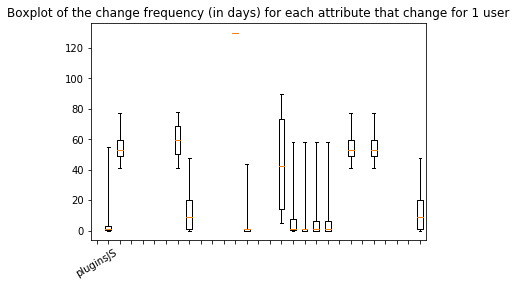

In [143]:
#frequency of changes of each attribute in time (days) (for 1 person) (Tout le monde change-il aussi souvent ?)

person=df_consistent[df_consistent['id']== "718eaf95-e9e2-42a2-ba4c-5316b5f45fdf"]

L=[]
attribute_not_change = []
for attribute in attributes_to_analyze:
    new_t= person[attribute]
    list_new_t=list(new_t)

    new_date = person['creationDate']
    list_new_date = list(new_date)

    first_value = list_new_date[0]
    diff=[]
    list_df_diff_days=[]
    for i in range(1,len(list_new_t)):
        if list_new_t[i-1] != list_new_t[i]:
            d=list_new_date[i-1]
            f=list_new_date [i]
            e = datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
            g = datetime.datetime.strptime(f, '%Y-%m-%d %H:%M:%S')
            h = datetime.datetime.strptime(first_value, '%Y-%m-%d %H:%M:%S')
            diff.append((g-h).days)
        df_diff=pd.DataFrame(diff)

    number_values = df_diff.count()
    df_number_values = pd.DataFrame(number_values)
    
    if df_number_values.empty:
       # print('The attribute : {} does not change'.format(attribute))
        attribute_not_change.append(attribute)

    
    elif df_number_values.values == 1:
        
        list_df_diff=list(df_diff[0])
        list_df_diff_days.append(list_df_diff[0])
        df_list_df_diff_days=pd.DataFrame(list_df_diff_days)

        #print("The attribute is {}\n{}".format(attribute,df_list_df_diff_days))

    else : 
        list_df_diff=list(df_diff[0])
        #list_df_diff_days=[]
        list_df_diff_days.append(list_df_diff[0])

        for i in range(1,len(list_df_diff)):
            list_df_diff_days.append(list_df_diff[i]-list_df_diff[i-1])
            df_list_df_diff_days=pd.DataFrame(list_df_diff_days)

        #print("The attribute is {}\n{}".format(attribute,df_list_df_diff_days))
    L.append(list_df_diff_days)
plt.boxplot(L, whis = 'range')
plt.gca().xaxis.set_ticklabels([attribute],rotation=30)
plt.title('Boxplot of the change frequency (in days) for each attribute that change for 1 user')   
plt.savefig('MultipleBoxPlot.png')

df_attribute_not_change=pd.DataFrame(attribute_not_change)
print("The attributes that do not change are :\n {}".format(df_attribute_not_change))

#"whis = 'range' " pour que les moustaches soient étendues jusqu'aux valeurs minimum et maximum

/home/spirals/PycharmProjects/stage/myvenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/spirals/PycharmProjects/stage/myvenv/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


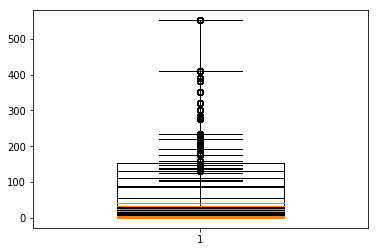

In [214]:
#To do: mettre toutes les boites sur un même graph + labels
#for attribute in attributes_to_analyze:

#frequency of changes of each attribute in time (days) independently of users
L=[]
attribute_not_change = []
for user_id in df_user_more_2_fingerprints['index']:
    person=df_consistent[df_consistent['id']== user_id]
    new_t= person['languageHttp']
    list_new_t=list(new_t)

    new_date = person['creationDate']
    list_new_date = list(new_date)

    first_value = list_new_date[0]
    diff=[]
    list_df_diff_days=[]
    for i in range(1,len(list_new_t)):
        if list_new_t[i-1] != list_new_t[i]:
            d=list_new_date[i-1]
            f=list_new_date [i]
            e = datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
            g = datetime.datetime.strptime(f, '%Y-%m-%d %H:%M:%S')
            h = datetime.datetime.strptime(first_value, '%Y-%m-%d %H:%M:%S')
            diff.append((g-h).days)
        df_diff=pd.DataFrame(diff)

    number_values = df_diff.count()
    df_number_values = pd.DataFrame(number_values)

    if df_number_values.empty:
        attribute_not_change.append(attribute)


    elif df_number_values.values == 1:
        list_df_diff=list(df_diff[0])
        list_df_diff_days.append(list_df_diff[0])
        df_list_df_diff_days=pd.DataFrame(list_df_diff_days)

    else : 
        list_df_diff=list(df_diff[0])
        list_df_diff_days.append(list_df_diff[0])

        for i in range(1,len(list_df_diff)):
            list_df_diff_days.append(list_df_diff[i]-list_df_diff[i-1])
            df_list_df_diff_days=pd.DataFrame(list_df_diff_days)
        
    L.extend(list_df_diff_days)
    #print(L)
    plt.boxplot(L, whis = 5, widths = [0.5])
#plt.gca().xaxis.set_ticklabels([attribute],rotation=30)
    np.mean(L)
#plt.violinplot(L)

In [49]:
#pour avoir la date de changement a cote de la valeur du changement (en cours)
for user_id in df_user_more_2_fingerprints['index']:
    table_id = df_consistent[df_consistent['id']== user_id]
    table_id_attribute_changes = table_id['timezoneJS']
    
    list_table_id_attribute_changes = list(table_id_attribute_changes)
    #print(table_id_attribute_changes)
    date_attribute_changes=[]
   # for value in table_id_attribute_changes:
      #  diff=[]
    for i in range(1,len(list_table_id_attribute_changes)):
        if list_table_id_attribute_changes[i-1] != list_table_id_attribute_changes[i]:
            date_attribute_changes.append({
              "cle": key,
              "Date":list_table_id_attribute_changes[i]
            })
    df_date_attribute_changes = pd.DataFrame(date_attribute_changes)
    print(df_date_attribute_changes)
   # df_year_month = pd.DataFrame(year_month)

     Date    cle
0    -120  66309
1     420  66309
2     -60  66309
3    -120  66309
4     -60  66309
5     360  66309
6    -120  66309
7     -60  66309
8    -120  66309
9     -60  66309
10   -120  66309
11    -60  66309
12   -120  66309
13    -60  66309
14    240  66309
15   -120  66309
16    300  66309
17   -120  66309
18    -60  66309
19   -120  66309
20    420  66309
21   -120  66309
22    240  66309
23    -60  66309
24   -120  66309
25    -60  66309
26   -120  66309
27    240  66309
28    -60  66309
29    240  66309
..    ...    ...
450   -60  66309
451   360  66309
452   -60  66309
453   420  66309
454   480  66309
455   -60  66309
456     0  66309
457   360  66309
458   -60  66309
459   360  66309
460   -60  66309
461   300  66309
462  -120  66309
463   -60  66309
464   360  66309
465   -60  66309
466   360  66309
467   300  66309
468   -60  66309
469   300  66309
470     0  66309
471   -60  66309
472   300  66309
473   -60  66309
474   300  66309
475   -60  66309
476   360  663

Empty DataFrame
Columns: []
Index: []
   Date    cle
0   300  66309
1   360  66309
   Date    cle
0   360  66309
1   420  66309
2   300  66309
3   360  66309
4   300  66309
5   360  66309
6   480  66309
7   360  66309
8   300  66309
   Date    cle
0  -480  66309
1  -540  66309
2   300  66309
3   240  66309
4   420  66309
5   240  66309
6   360  66309
7   300  66309
   Date    cle
0   300  66309
1   -60  66309
2  -120  66309
3   -60  66309
4  -600  66309
   Date    cle
0  -600  66309
1  -660  66309
   Date    cle
0   -60  66309
   Date    cle
0   -60  66309
   Date    cle
0   -60  66309
1   360  66309
2   -60  66309
   Date    cle
0     0  66309
    Date    cle
0    240  66309
1    420  66309
2    300  66309
3    420  66309
4    480  66309
5    300  66309
6    480  66309
7    300  66309
8    480  66309
9    300  66309
10   480  66309
11   420  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
   Date    cle
0  -120  66309
1   -60  66309
Empty DataFrame
Columns: [

   Date    cle
0   420  66309
1   480  66309
   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0     0  66309
1   -60  66309
2  -120  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   360  66309
1   300  66309
2   240  66309
   Date    cle
0   -60  66309
   Date    cle
0  -180  66309
   Date    cle
0   -60  66309
1  -120  66309
2   -60  66309
   Date    cle
0   480  66309
1   420  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
   Date    cle
0  -120  66309
   Date    cle
0   300  66309
   Date    cle
0   300  66309
1   240  66309
   Date    cle
0  -660  66309
   Date    cle
0   -60  66309
   Date    cle
0  -120  66309
1   -60  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -480  66309
1  -180  66309
   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
   Date    cle
0     0  66309
   Date    cle
0   240  66309
1   420  66309
2   240  66309
3   300  66309


   Date    cle
0   -60  66309
   Date    cle
0   300  66309
1   240  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -480  66309
   Date    cle
0   -60  66309
1     0  66309
   Date    cle
0   -60  66309
   Date    cle
0   420  66309
1   -60  66309
2     0  66309
   Date    cle
0   240  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
   Date    cle
0  -120  66309
1   -60  66309
   Date    cle
0   300  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
   Date    cle
0   420  66309
1   360  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   180  66309
   Date    cle
0   240  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
   Date    cle
0   420  66309
1   480  66309
2   420  66309
   Date    cle
0   -60  66309
1  -120  66309
2   300  66309
   Date    cle

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
   Date    cle
0     0  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
   Date    cle
0   -60  66309
   Date    cle
0  -660  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   300  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
1     0  66309
2  -120  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
   Date   

   Date    cle
0   180  66309
   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -180  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
1   -60  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
   Date    cle
0   360  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -180  66309
   Date    cle
0   300  66309
Empty DataFrame
Columns: 

Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -180  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   300  66309
   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -360  66309
1  -180  66309
2  -360  66309
3   360  66309
4  -360  66309
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   420  66309
1   480  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   300  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
   Date    cle
0  -180  66309
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
1  -120  66309
2   -60  66309
3  -120  66309
   Date    cle
0  -240  66309
1  -180  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty Dat

   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
   Date    cle
0   300  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   420  66309
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   300  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   240  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -240  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   360  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
1   -60  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
I

   Date    cle
0  -120  66309
   Date    cle
0    60  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   420  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: [

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0  -120  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   360  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
   Date    cle
0   -60  66309
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: [

In [190]:
#Attributs qui changent en même temps pour une personne : en cours

table=[]
person=df_consistent[df_consistent['id']== "718eaf95-e9e2-42a2-ba4c-5316b5f45fdf"]

for attribute in attributes_to_analyze:

    attribute_values =person[attribute]
    list_attribute_values = list(attribute_values)
    counter=0

    for i in range(1,len(list_attribute_values)):
        if list_attribute_values[i-1] != list_attribute_values[i]:
            counter+=1
        else:
            counter=counter
        frequency = counter/len(list_attribute_values)

    table.append({
        "Attributes" : attribute,
        "Frequency of changes" : frequency
    })


df_table= pd.DataFrame(table)

#pour avoir seulement les attributs qui changent(donc fréquence>0) 
tableau = df_table[df_table["Frequency of changes" ]>0].reset_index(drop=True)
print(tableau)

#et qui ont au moins la même fréquence qu'un autre attribut
tableau2 = tableau.groupby(["Frequency of changes"]).size()
print(tableau2)


for value in tableau2:
    if value!=1:
        print(value)

        
        
        
        
        
        
"""
L=[]
for b in range(0,len(tableau["Attributes"])):
    for c in range(b+1, len(tableau["Attributes"])):
        if tableau["Frequency of changes"][b]==tableau["Frequency of changes"][c]: 
            for i in range(1,len(list(person[attribute]))):
                if list(person[attribute])[i-1] != list(person[attribute])[i]:
                    counter+=1
                else:
                    counter=counter
            #L.append(tableau["Attributes"][b])
            #L.append(tableau["Attributes"][c])
        else:
            c+=1
            
            print(counter)
   # print(L)





L=[]
for attribut,frequency in tableau:
    tableau2 = tableau.groupby(["Frequency of changes"]).size()
    if tableau2.value!=1:
        L.append({
            "Att":attribute,
            "val":value
        })
        print(L)
        

#print(tableau[0])
  #  print(tableau)

#for a in range(0,len(df_table["Frequency of changes"])):
 #   for b in range(1,len(df_table["Frequency of changes"])):
 #       if df_table["Frequency of changes"][a]==df_table["Frequency of changes"][b]:
           # print(df_table["Attributes"][b])
    #print()
    
"""

              Attributes  Frequency of changes
0            addressHttp              0.440559
1          userAgentHttp              0.027972
2              orderHttp              0.013986
3        pluginsJSHashed              0.139860
4             timezoneJS              0.006993
5           resolutionJS              0.517483
6         canvasJSHashed              0.027972
7       fontsFlashHashed              0.293706
8        resolutionFlash              0.671329
9          languageFlash              0.279720
10         platformFlash              0.279720
11  globalBrowserVersion              0.027972
12   majorBrowserVersion              0.027972
13             pluginsJS              0.139860
Frequency of changes
0.006993    1
0.013986    1
0.027972    4
0.139860    2
0.279720    2
0.293706    1
0.440559    1
0.517483    1
0.671329    1
dtype: int64
4
2
2


'\nL=[]\nfor b in range(0,len(tableau["Attributes"])):\n    for c in range(b+1, len(tableau["Attributes"])):\n        if tableau["Frequency of changes"][b]==tableau["Frequency of changes"][c]: \n            for i in range(1,len(list(person[attribute]))):\n                if list(person[attribute])[i-1] != list(person[attribute])[i]:\n                    counter+=1\n                else:\n                    counter=counter\n            #L.append(tableau["Attributes"][b])\n            #L.append(tableau["Attributes"][c])\n        else:\n            c+=1\n            \n            print(counter)\n   # print(L)\n\n\n\n\n\nL=[]\nfor attribut,frequency in tableau:\n    tableau2 = tableau.groupby(["Frequency of changes"]).size()\n    if tableau2.value!=1:\n        L.append({\n            "Att":attribute,\n            "val":value\n        })\n        print(L)\n        \n\n#print(tableau[0])\n  #  print(tableau)\n\n#for a in range(0,len(df_table["Frequency of changes"])):\n #   for b in range(1